In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [16]:
merged_data.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000,1000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN,199,4,178,66,4,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN,Abigail Jones,South America,2022-04-16,ActiveWear Smartwatch,Books,NaN
freq,1,11,19,1,NaN,NaN,NaN,11,304,19,40,270,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407,NaN,NaN,NaN,NaN,NaN,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639,NaN,NaN,NaN,NaN,NaN,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000,NaN,NaN,NaN,NaN,NaN,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000,NaN,NaN,NaN,NaN,NaN,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000,NaN,NaN,NaN,NaN,NaN,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000,NaN,NaN,NaN,NaN,NaN,404.40000


In [5]:
# Checking for missing values
print("\nMissing Values:\n", merged_data.isnull().sum())


Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [6]:
# Top customers by transaction count
top_customers = merged_data['CustomerName'].value_counts().head(10)
print("\nTop 10 Customers by Transaction Count:\n", top_customers)


Top 10 Customers by Transaction Count:
 CustomerName
Abigail Jones      11
William Adams      11
Paul Parsons       10
Matthew Johnson    10
Gerald Hines       10
David Li           10
Hunter Fuller       9
Nancy Walker        9
Misty Higgins       9
Belinda Garner      9
Name: count, dtype: int64


In [7]:
# Revenue by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Category:\n", category_revenue)



Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [8]:
# Most purchased products
most_purchased_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nMost Purchased Products:\n", most_purchased_products)



Most Purchased Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [10]:
# Region-wise revenue
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()
print("\nRegion-wise Revenue:\n", region_revenue)


Region-wise Revenue:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


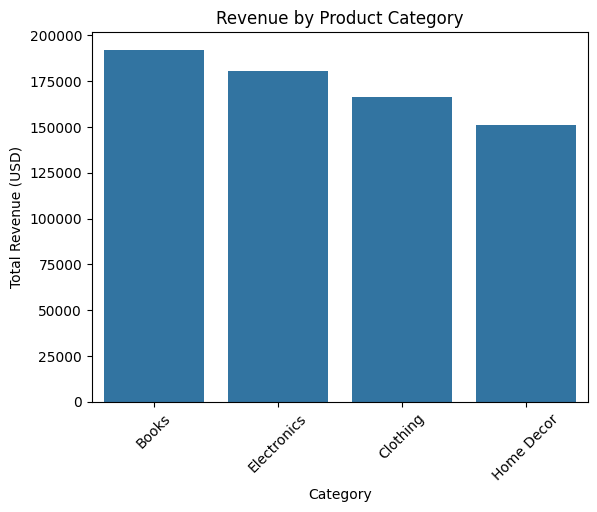

In [11]:
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

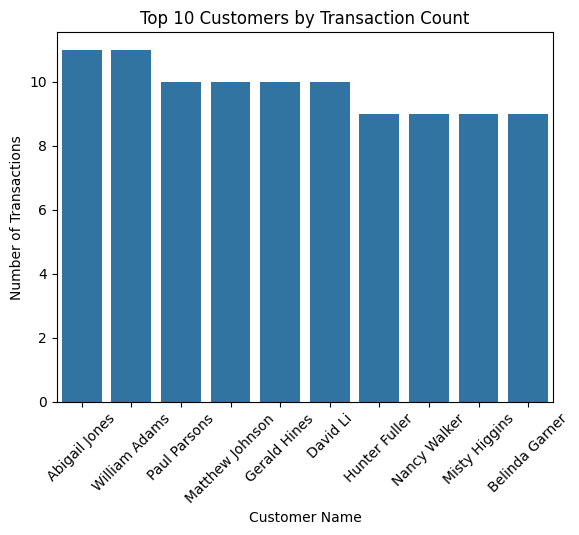

In [12]:
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Top 10 Customers by Transaction Count")
plt.ylabel("Number of Transactions")
plt.xlabel("Customer Name")
plt.xticks(rotation=45)
plt.show()

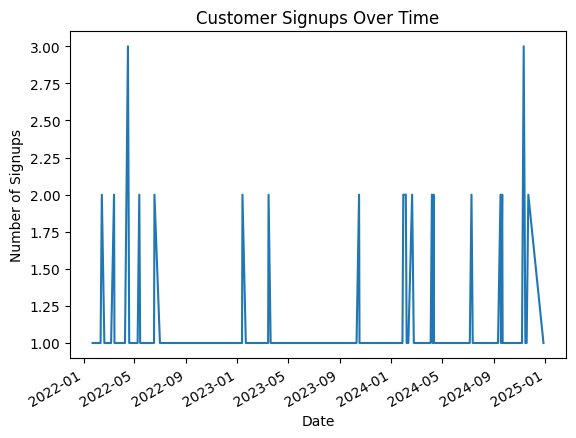

In [15]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.date.value_counts().sort_index()

plt.plot(signup_trends.index, signup_trends.values)
plt.title("Customer Signups Over Time")
plt.ylabel("Number of Signups")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.gcf().autofmt_xdate()
plt.show()


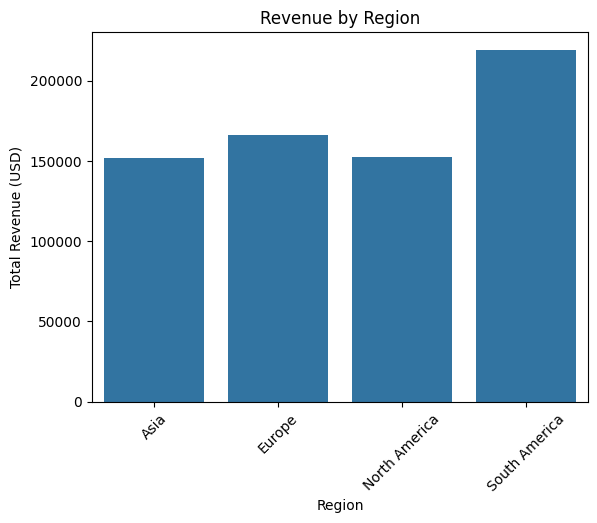

In [14]:
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()